In [1]:
from dynamics.robot_selector import robot_selector
import numpy as np
from dynamics.data_gen_robot import data_gen_robot, data_gen_robot_multi
import matplotlib.pyplot as plt

In [2]:
robot_name = "3R_2D"
params_incor = {}
params_incor['m'] = 1
params_incor['I'] = np.eye(3)
params_incor['l'] = 0.33

params_cor = {}
params_cor['m'] = 3
params_cor['I'] = 1.5*np.eye(3)
params_cor['l'] = 0.6

robot_cor = robot_selector(robot_name, params_cor)
robot_incor = robot_selector(robot_name, params_incor)

In [3]:
print(robot_cor, robot_incor)

DHRobot: 3R_2D, 3 joints (RRR), dynamics, standard DH parameters
┌────┬────┬─────┬──────┐
│θⱼ  │ dⱼ │ aⱼ  │  ⍺ⱼ  │
├────┼────┼─────┼──────┤
│ q1 │  0 │ 0.6 │ 0.0° │
│ q2 │  0 │ 0.6 │ 0.0° │
│ q3 │  0 │ 0.6 │ 0.0° │
└────┴────┴─────┴──────┘

┌─┬──┐
└─┴──┘
 DHRobot: 3R_2D, 3 joints (RRR), dynamics, standard DH parameters
┌────┬────┬──────┬──────┐
│θⱼ  │ dⱼ │  aⱼ  │  ⍺ⱼ  │
├────┼────┼──────┼──────┤
│ q1 │  0 │ 0.33 │ 0.0° │
│ q2 │  0 │ 0.33 │ 0.0° │
│ q3 │  0 │ 0.33 │ 0.0° │
└────┴────┴──────┴──────┘

┌─┬──┐
└─┴──┘



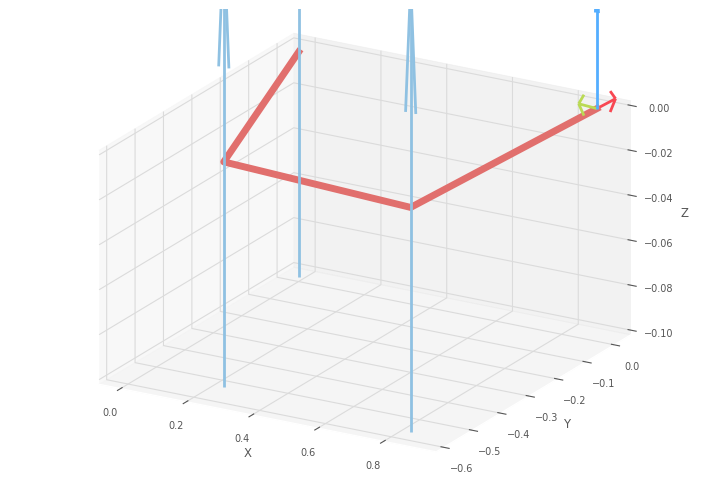

PyPlot3D backend, t = 0.05, scene:
  robot: Text(-0.024931417360365287, 0.03266553494469309, '3R_2D')

<Figure size 640x480 with 0 Axes>

In [4]:
q = robot_cor.random_q()
robot_cor.plot(q)

In [12]:
num_traj = 200
num_snaps = 1000
dt = 0.005
controller = 'controller'
num_states = robot_incor.random_q().shape[0]
num_inputs = num_states

if robot_incor.name.__contains__("2D"):
    num_states_cart = 2
else:
    num_states_cart = 3
T = np.linspace(0,num_snaps*dt,num_snaps)

In [13]:
X_end_cor, X_cor, X_end_incor, X_incor, U = data_gen_robot_multi(dt,num_traj,num_snaps, robot_cor, robot_incor, controller)

In [14]:
print(sum(sum(sum(np.isnan(X_cor)))))
print(sum(sum(sum(np.isnan(X_incor)))))

0
0


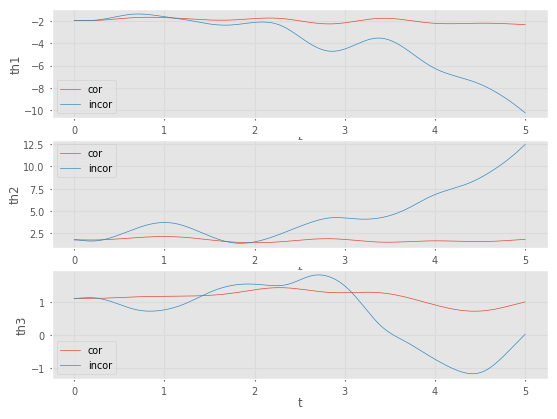

In [15]:
j = 20
for i in range(int(num_states)):
    plt.subplot(num_states,1,i+1)
    plt.xlabel("t")
    plt.ylabel("th"+str(i+1))
    plt.plot(T,X_cor[j,:,i], label ="cor")
    plt.plot(T,X_incor[j,:,i], label = "incor")
    plt.legend()

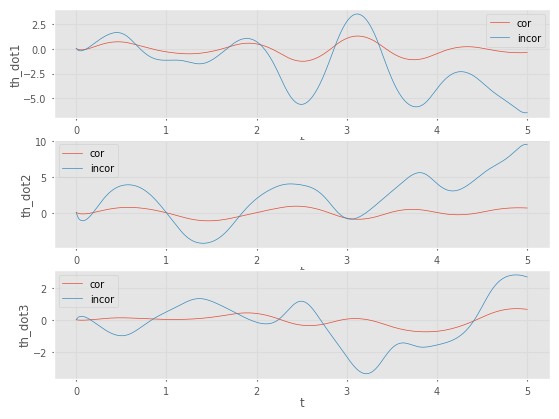

In [16]:

for i in range(int(num_states)):
    plt.subplot(num_states,1,i+1)
    plt.xlabel("t")
    plt.ylabel("th_dot"+str(i+1))
    plt.plot(T,X_cor[j,:,num_states+i], label = "cor")
    plt.plot(T,X_incor[j,:,num_states+i], label = "incor")
    plt.legend()

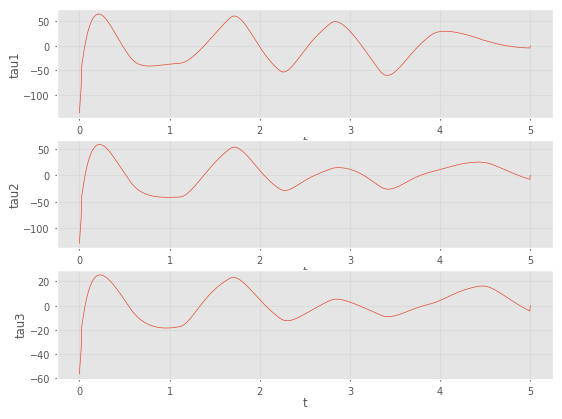

In [17]:

for i in range(int(num_states)):
    plt.subplot(num_states,1,i+1)
    plt.xlabel("t")
    plt.ylabel("tau"+str(i+1))
    plt.plot(T,U[j,:,i])

array([[[ 4.90529402e+01,  4.32006410e+01,  1.75400452e+01],
        [ 4.00750998e+01,  3.66943021e+01,  1.43070578e+01],
        [ 3.15464851e+01,  3.04984283e+01,  1.12329266e+01],
        ...,
        [-2.88539371e+00, -1.97138901e+00, -1.85745784e+00],
        [-2.92968621e+00, -2.03632510e+00, -1.96349438e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 6.79510381e+01,  3.90173343e+01,  1.58457310e+01],
        [ 5.16816779e+01,  2.85799526e+01,  1.07021231e+01],
        [ 3.62528515e+01,  1.86900897e+01,  5.83231790e+00],
        ...,
        [ 1.97141786e-01,  1.94766170e+00, -2.97354339e-01],
        [ 1.09384112e+00,  2.50365532e+00, -3.34469976e-03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 7.49753686e+01,  9.39765314e+01,  4.55432705e+01],
        [ 5.90560258e+01,  7.64360833e+01,  3.66386321e+01],
        [ 4.39341988e+01,  5.97698140e+01,  2.81815275e+01],
        ...,
        [ 9.79967716e-01, -2.87864042e+00,